# Supplementary Figure 6. Explore CCC results using LIANA and their consensus score

We wanted to confirm our observations of the lack of correlation between CCC and colocalization by using another method to calculate CCC. In this case we selected LIANA, as it runs the main methodologies for CCC prediction and then, computes a consensus score. 

In [1]:
global_path = './cell-cell-communication/' ## Path to the github downloaded repository

In [2]:
import scanpy as sc
import liana as li

import pandas as pd
import numpy as np 
from collections import Counter
from scipy.spatial import distance


import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

import sys
sys.path.insert(1, global_path + 'Functions/')
from downstream_analysis import  compute_colocalization, plot_CCCvsColoc, run_LIANA



title_size = 12
labelout_size = 10
label_size = 8
ticks_size = 6

In [22]:
# Run LIANA
counts_file_path = global_path + 'Data/Brain/Input_CP/adata_L5_region_ass.h5ad'
meta_file_path = global_path + 'Data/Brain/Input_CP/metadata_L5_region_ass.tsv'
list_loc = ['CC2', 'CC1']
l = run_LIANA(counts_file_path, list_loc, 'celltype_loc')


Using `.X`!
799 features of mat are empty, they will be removed.
['Metazoa_SRP', 'Y_RNA'] contain `_`. Consider replacing those!
Using resource `consensus`.
0.21 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 1668 samples and 33818 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████| 100/100 [00:00<00:00, 101.08it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|██████████| 100/100 [00:04<00:00, 22.07it/s]
/aloy/home/epareja/2022/single_cell/paper_folders/Functions/downstream_analysis.py:432: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [23]:
meta_cells_total = pd.read_csv(global_path + 'Results/Brain/CellTrek/meta_cellcharting_spot_info.csv')
adata = sc.read(counts_file_path)

# Select the cells assigned to each location
cellsCC1 = adata.obs[adata.obs['celltype_loc'] == 'CC1'].index
cellsCC2 = adata.obs[adata.obs['celltype_loc'] == 'CC2'].index

# Select the unique spots where each of the cancer cells are present
inner_spots = meta_cells_total[meta_cells_total.id_raw.isin(cellsCC1)].spot.unique()
outer_spots = meta_cells_total[meta_cells_total.id_raw.isin(cellsCC2)].spot.unique()

# Compute the colocalization between cancer cells in the two locations and the rest of the cells in the dataset
# convert CellTrek result to count matrix
df_spot2cell = meta_cells_total[['spot', 'cell_type']]
spot2cell = df_spot2cell.pivot_table(index='spot', columns='cell_type', aggfunc=len, fill_value=0)
closest_cells_df = compute_colocalization(spot2cell, 'L5 IT',outer_spots, inner_spots)

In [24]:
subset = ['L4', 'Vip',  'Endo',  'Astro', 'L6 IT', 'Pvalb', 'L2/3 IT', 'Lamp5']
set(subset).difference(set(l.cell))

set()

/aloy/home/epareja/2022/single_cell/paper_folders/Functions/downstream_analysis.py:286: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


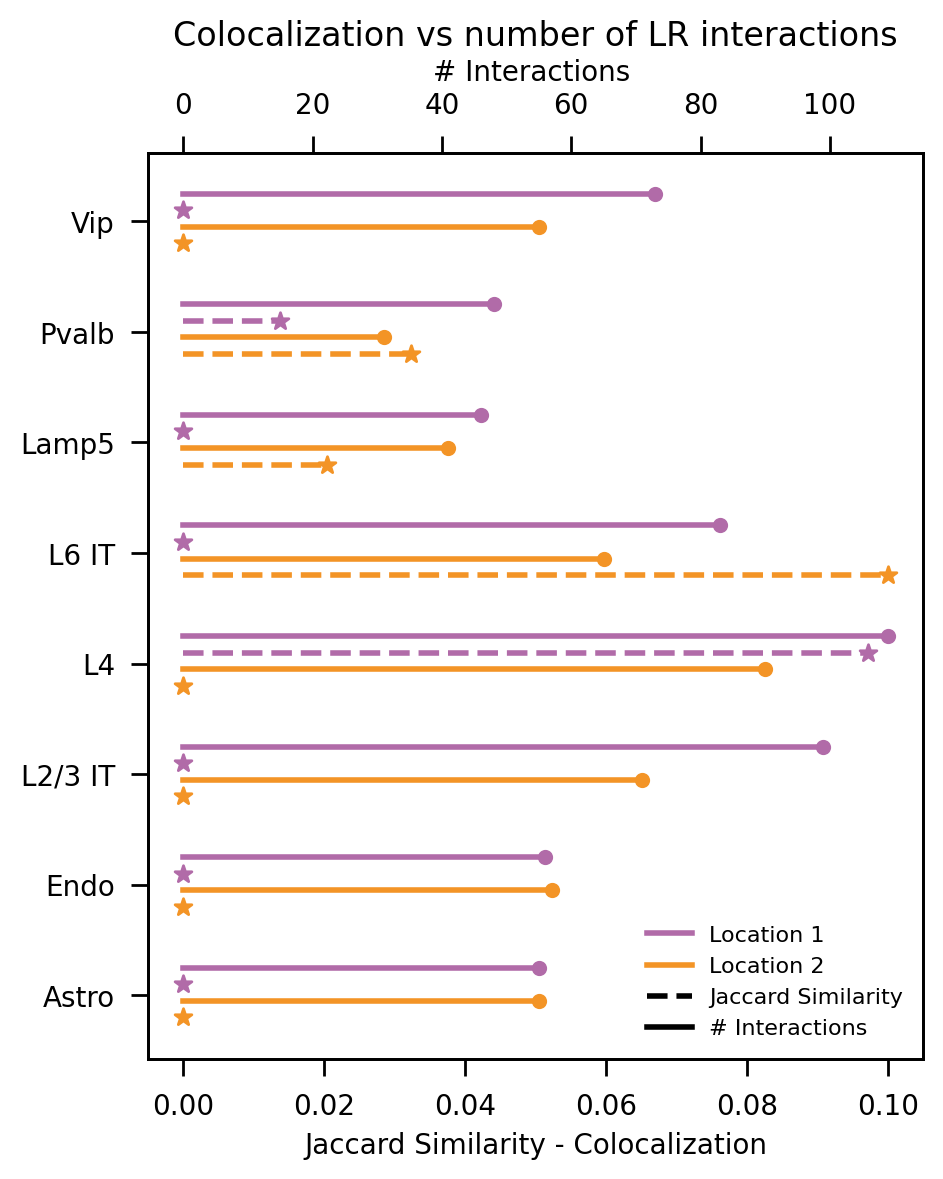

In [25]:
data_cc_coloc = plot_CCCvsColoc(closest_cells_df, l, subset)


The results are very similar to the CellPhone results